## Importacion de librerias y lectura del dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
sns.set_theme(style="whitegrid")

print("Cargado todo correctamente")

Cargado todo correctamente


## Carga del dataset

In [2]:
orders = pd.read_csv("../data/olist_orders_dataset.csv")
customers = pd.read_csv("../data/olist_customers_dataset.csv")
order_items = pd.read_csv("../data/olist_order_items_dataset.csv")
products = pd.read_csv("../data/olist_products_dataset.csv")
reviews = pd.read_csv("../data/olist_order_reviews_dataset.csv")
payments = pd.read_csv("../data/olist_order_payments_dataset.csv")

print("Datasets cargados correctamente.")


Datasets cargados correctamente.


## Inspeccion rapida de los datos

In [3]:
orders.head()
customers.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


## Estructura y tipos de datos


In [4]:
orders.info()
customers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null 

## Estadísticas descriptivas


In [5]:
orders.describe(include="all").T
customers.describe(include="all").T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id,99441,99441,06b8999e2fba1a1fbc88172c00ba8bc7,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_unique_id,99441,96096,8d50f5eadf50201ccdcedfb9e2ac8455,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_zip_code_prefix,99441.0,NaN,NaN,NaN,35137.474583,29797.938996,1003.0,11347.0,24416.0,58900.0,99990.0
customer_city,99441,4119,sao paulo,15540,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_state,99441,27,SP,41746,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Análisis valores faltantes



In [6]:
orders.isna().sum().sort_values(ascending=False)
customers.isna().sum().sort_values(ascending=False)


customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

## Distribución del estado de las órdenes


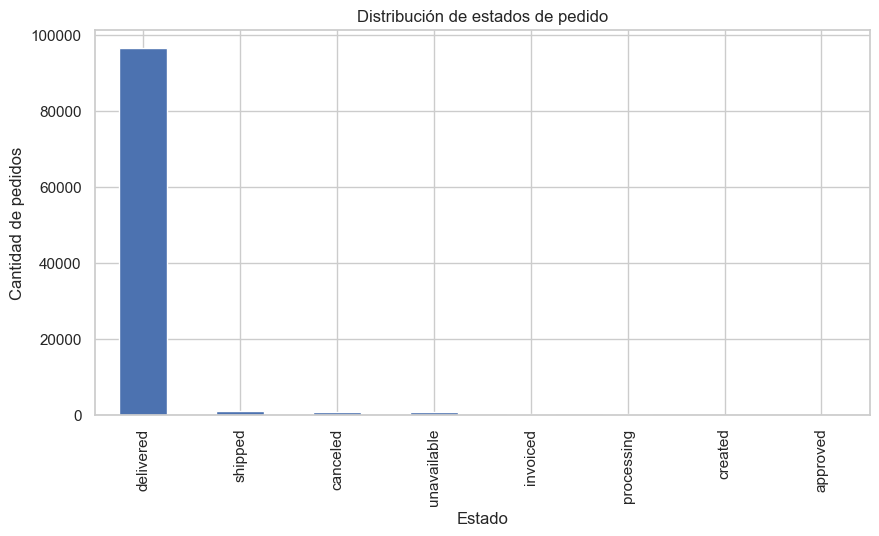

In [7]:
orders["order_status"].value_counts().plot(kind="bar", figsize=(10,5))
plt.title("Distribución de estados de pedido")
plt.xlabel("Estado")
plt.ylabel("Cantidad de pedidos")
plt.show()


## Evolución temporal de las órdenes


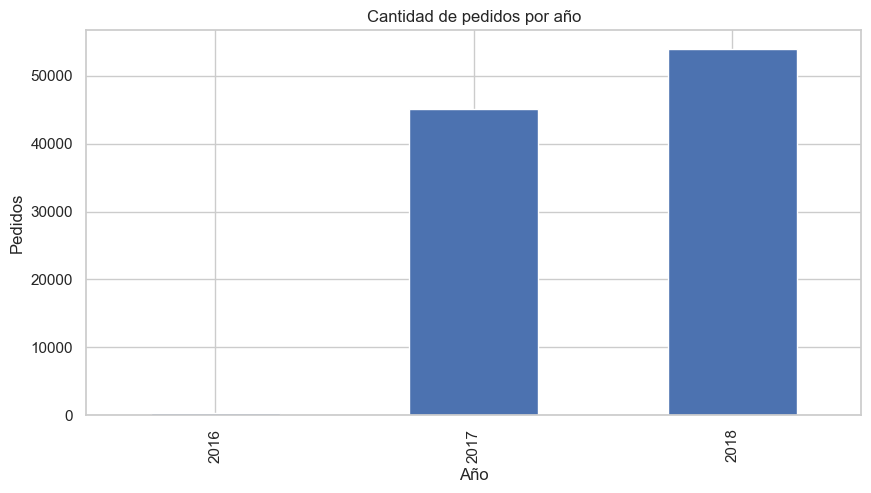

In [8]:
orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])

orders["year"] = orders["order_purchase_timestamp"].dt.year

orders["year"].value_counts().sort_index().plot(kind="bar", figsize=(10,5))
plt.title("Cantidad de pedidos por año")
plt.xlabel("Año")
plt.ylabel("Pedidos")
plt.show()


## Categorías de productos más frecuentes


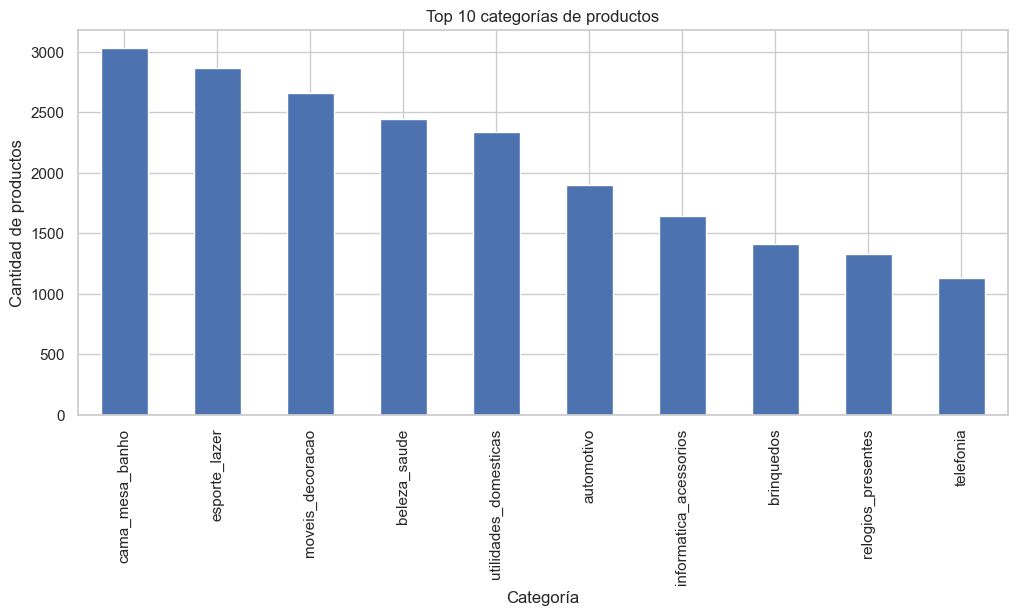

In [9]:
products["product_category_name"].value_counts().head(10).plot(kind="bar", figsize=(12,5))
plt.title("Top 10 categorías de productos")
plt.xlabel("Categoría")
plt.ylabel("Cantidad de productos")
plt.show()


# Comentarios Iniciales del EDA

- El dataset de Olist contiene varios archivos relacionados entre sí.
- Se observa que la mayoría de los pedidos ocurren entre 2016 y 2018.
- Existen valores nulos en `orders` especialmente en columnas de entrega.
- La categoría más común de productos parece ser...
- El estado de pedido más frecuente es "delivered".

Este EDA servirá como base para los siguientes análisis del challenge:
- Predicción de deserción (churn)
- Recomendación de productos (clustering)
- Estimación de tiempos de entrega (regresión)
